# Machine Learning Pipeline - Data Analysis

We will implement each of **the steps in the Machine Learning Pipeline**: **Data Analysis**, Feature Engineering, Feature Selection, Model Training, Obtaining Predictions / Scoring!

We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)!

**The aim of the project** is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses. We aim to minimise the difference between the real price and the price estimated by our model. We will evaluate model performance with the: **mean squared error (mse)**. **root squared of the mean squared error (rmse)**, **r-squared (r2)**. 

# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  # for the yeo-johnson transformation
pd.pandas.set_option('display.max_columns', None) # displays all the columns of df!

**Load dataset !**

In [2]:
data = pd.read_csv('train.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Drop id, it is just a number given to identify each house!**

In [3]:
data.drop('Id', axis=1, inplace=True)
data.shape

(1460, 80)

**Data has 1460 rows, and 80 columns, 79 are predictive variables and 1 is the target variable: SalePrice!**

## Analysis

Analyse the **target variable!** Determine variable types (**categorical and numerical**) and **missing data**. 
**Numerical variables are discrete or continuous**, their distributions and transformations
In **categorical variables**, check **cardinality, rare Labels and special mappings!**

## Target

**Histogran of target distribution!**

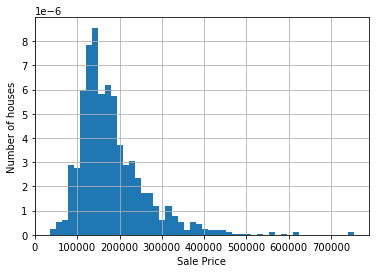

In [4]:
data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

The target is **continuous**, and the distribution is **skewed towards the right**.

**Transform the target using the logarithm yo improve the value spread!**

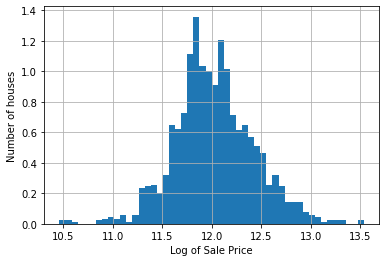

In [5]:
np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Log of Sale Price')
plt.show()

Now the distribution looks more **Gaussian**.

## Variable Types

**Let's identify the categorical and numerical variables! MSSubClass has numeric values, but it is also categorical by definition!**

In [6]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars = cat_vars + ['MSSubClass']
len(cat_vars)

44

**Cast all variables as categorical**

In [7]:
data[cat_vars] = data[cat_vars].astype('O')

**Numerical variables!**

In [8]:
num_vars = [var for var in data.columns if var not in cat_vars and var != 'SalePrice']
len(num_vars)

35

# Missing values

**Find out which variables of the dataset contain missing values and determine their percentage!**

In [9]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

**Let's visualize the percentage of missing values in the variables as follows: Note that the first four is high!**

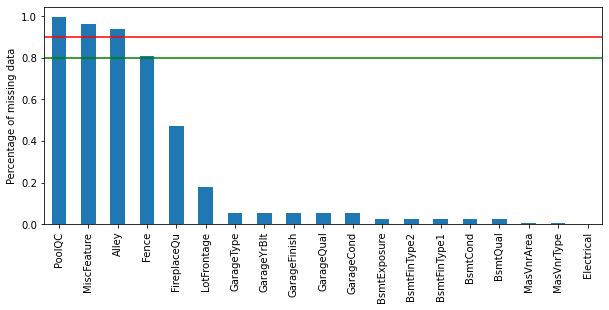

In [10]:
data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')
plt.show()

**Which are numerical or categorical from variables with missing data!**

In [11]:
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]
print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  16
Number of numerical variables with na:  3


In [12]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [13]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Relationship between missing data and Sale Price

This function evaluates the **price of the house** in each variable with **missing**!

In [14]:
def analyse_na_value(df, var):
    df = df.copy()  # First copy of the dataframe!
    df[var] = np.where(df[var].isnull(), 1, 0)  # interim variable shows 1 if missing
    # median and st deviation of the sale price (groups 1 and 0),
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')
    plt.show()     # bar graph

**Run the function on each variable with missing data**

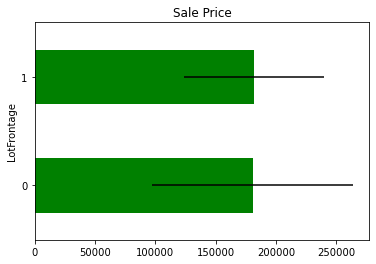

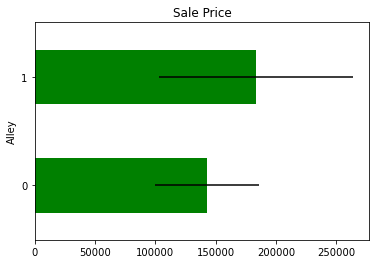

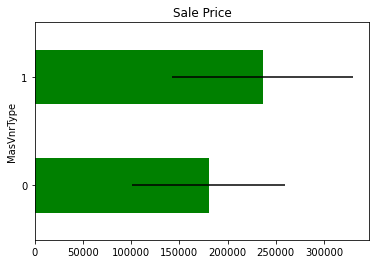

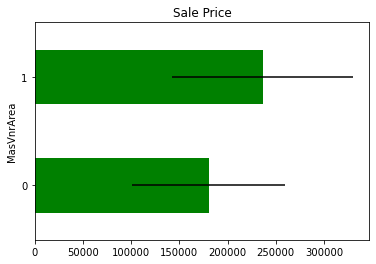

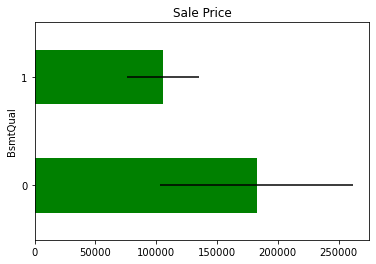

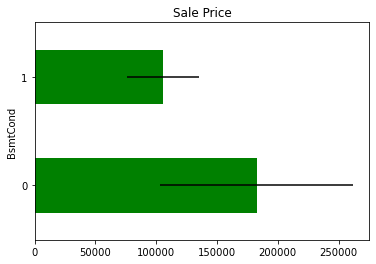

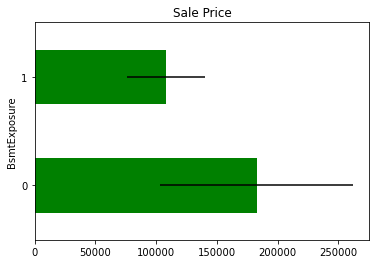

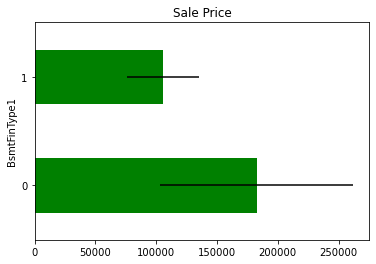

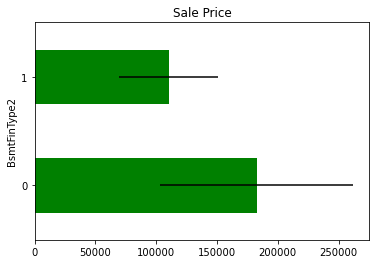

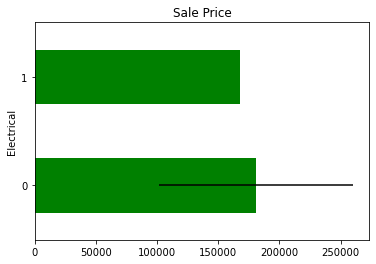

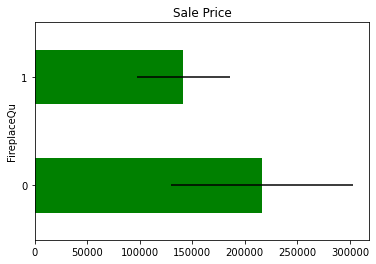

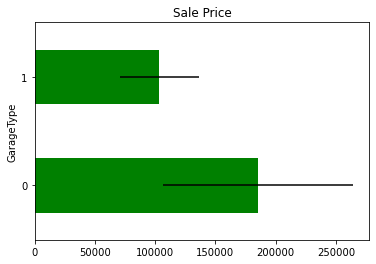

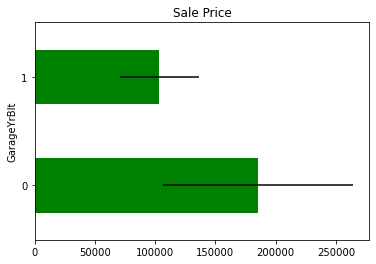

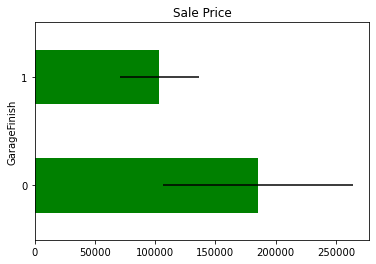

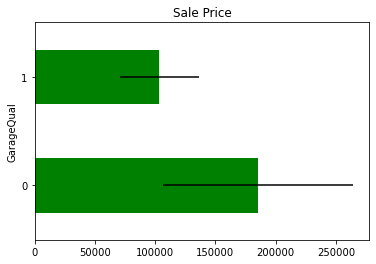

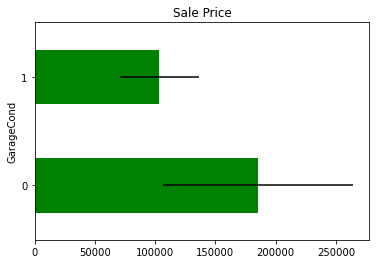

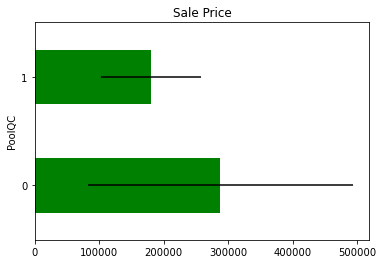

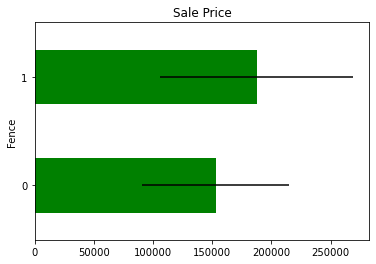

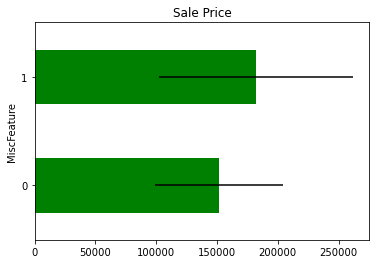

In [15]:
for var in vars_with_na:
    analyse_na_value(data, var)

In some variables, the average Sale Price in houses where the information is missing, differs from the average Sale Price in houses where information exists. This suggests that data being missing could be a good predictor of Sale Price.

# Numerical variables

In [16]:
print('Number of numerical variables: ', len(num_vars))
data[num_vars].head()

Number of numerical variables:  35


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


## Temporal variables

We have 4 year variables in the dataset!

**List of variables that contain year information!**

In [17]:
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

**Explore them!**

In [18]:
for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Explore the evolution of the sale price with the years in which the house was sold:

**Plot median sale price vs year in which it was sold!**

Text(0, 0.5, 'Median House Price')

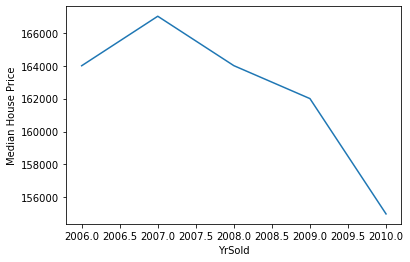

In [19]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

There has been a **drop in the value of the houses.** That is **unusual** in real life, house prices typically go up as years go by. Explore a bit further. **Plot median sale price vs year in which it was built!**

Text(0, 0.5, 'Median House Price')

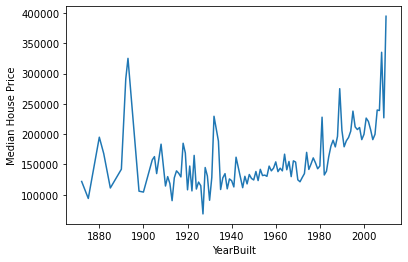

In [20]:
data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

Newly built / younger houses tend to be more expensive. Could it be that lately older houses were sold? Let's have a look at that.

This function captures the **elapsed years** between the **Year variables** and **the year in which the house was sold**:

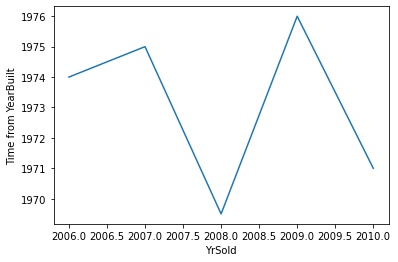

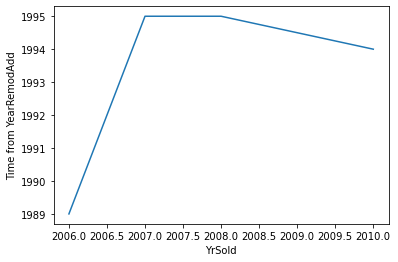

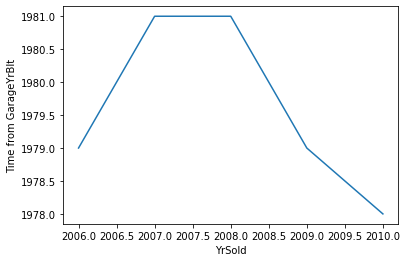

In [21]:
def analyse_year_vars(df, var):
    df = df.copy()
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

The plots says, **towards 2010**, the houses sold had **older garages** (not remodelled recently). This can explain **why cheaper prices** in recent years!

**A function plot sale prices vs the time since last remodelled, since built, etc.. !**

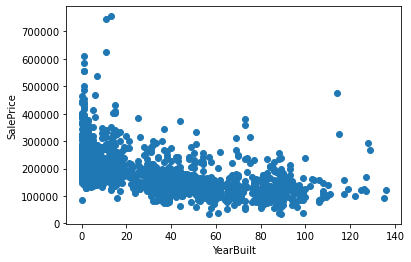

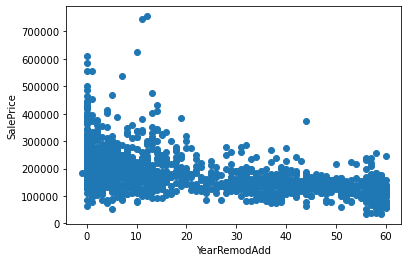

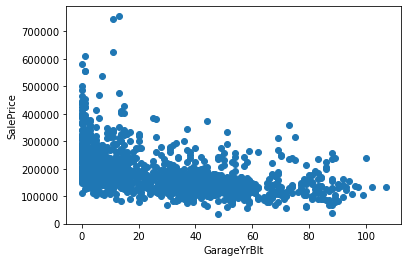

In [22]:
def analyse_year_vars(df, var):
    df = df.copy()
    df[var] = df['YrSold'] - df[var]
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

There is a **tendency to a decrease in price**, with **older houses**.

## Discrete variables

**Find which variables are discrete!**

In [23]:
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in year_vars]
print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  13


**Visualise the discrete variables!**

In [24]:
data[discrete_vars].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


Here, the discrete variables are  **qualifications (Qual)**, **grading scales** (Cond), **the number of rooms, or units** (FullBath, GarageCars), or **the area of the room (KitchenAbvGr)**. We expect higher prices, with bigger numbers. Let's analyse their contribution to the house price. **MoSold** the month in which the house was sold.

**Make boxplot with Catplot and add data points to boxplot with stripplot!**

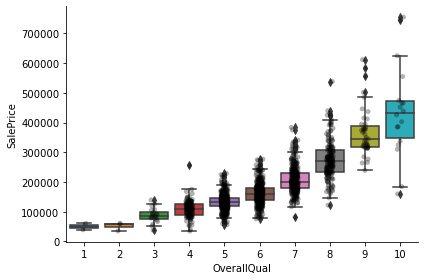

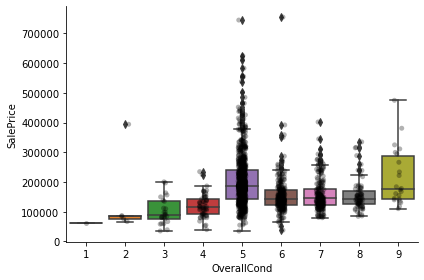

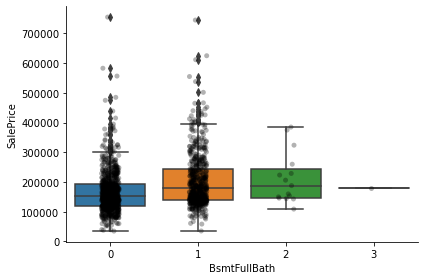

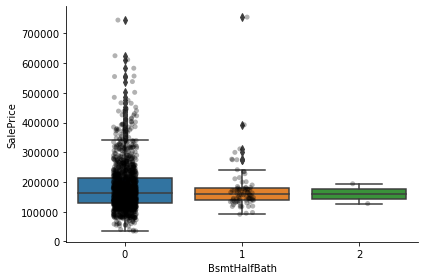

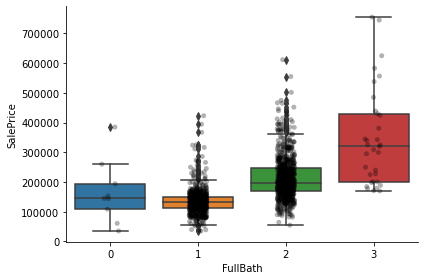

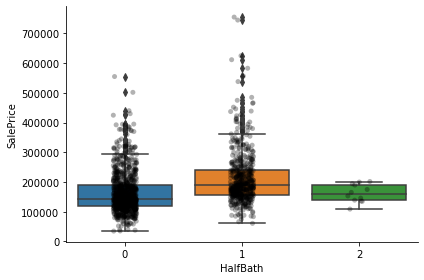

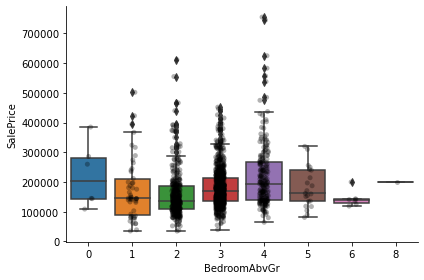

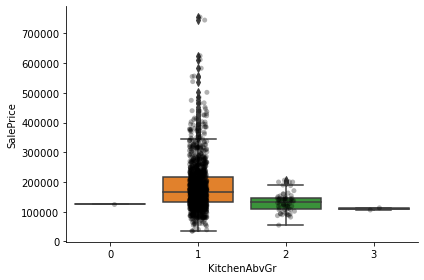

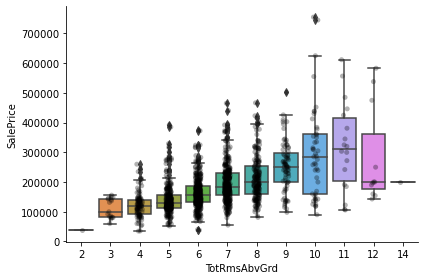

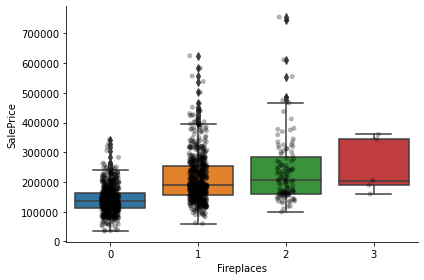

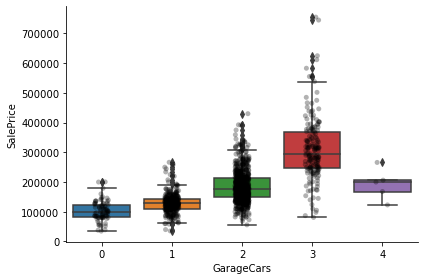

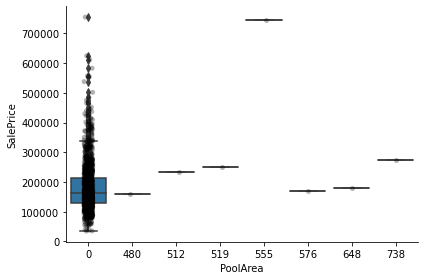

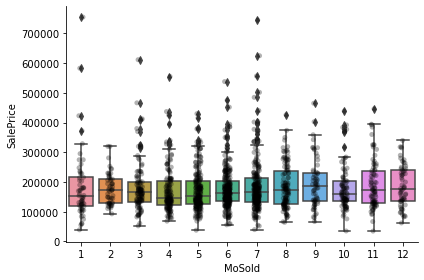

In [25]:
for var in discrete_vars:
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most **discrete numerical variables**, we see an **increase in the sale price** with the **quality**, or **overall condition**, or  **number of rooms**, or **surface**. Some variables has no this tendency. Most likely that variable is not a **good predictor of sale price**.

## Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not temporal or discrete.

**List of continuous variables!**

In [26]:
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars]
print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


**Visualise the continuous variables!**

In [27]:
data[cont_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


**Plot histograms for all continuous variables!**

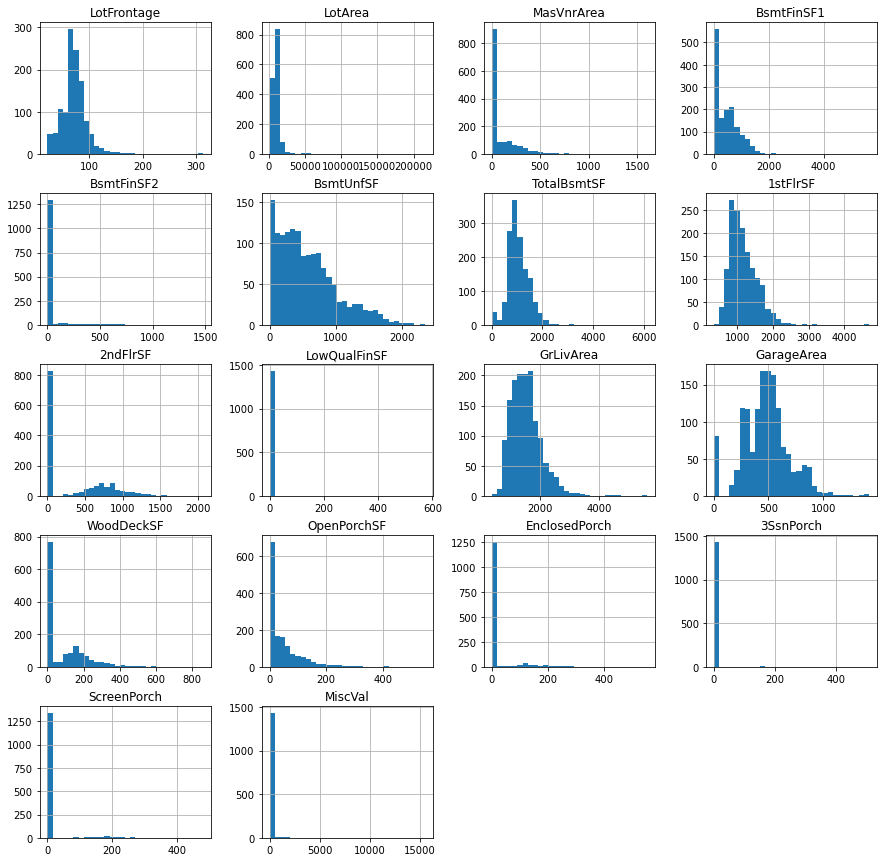

In [28]:
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

The variables are not normally distributed. Some of them are **extremely skewed** like **3SsnPorch, ScreenPorch and MiscVal**. Transforming the variables to improve the value spread, can improve the model performance. Let's apply a **Yeo-Johnson transformation** to variables like **LotFrontage, LotArea, BsmUnfSF**, and a **binary transformation** to variables like **3SsnPorch, ScreenPorch and MiscVal**.

**Make a list with the super skewed variables**

In [29]:
skewed = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
          '3SsnPorch', 'ScreenPorch', 'MiscVal']

**Capture the remaining continuous variables!**

In [30]:
cont_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
             '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',]

### Yeo-Johnson transformation

**Apply a yeo-johnson transformation, and analyse the distributions of the variables!**

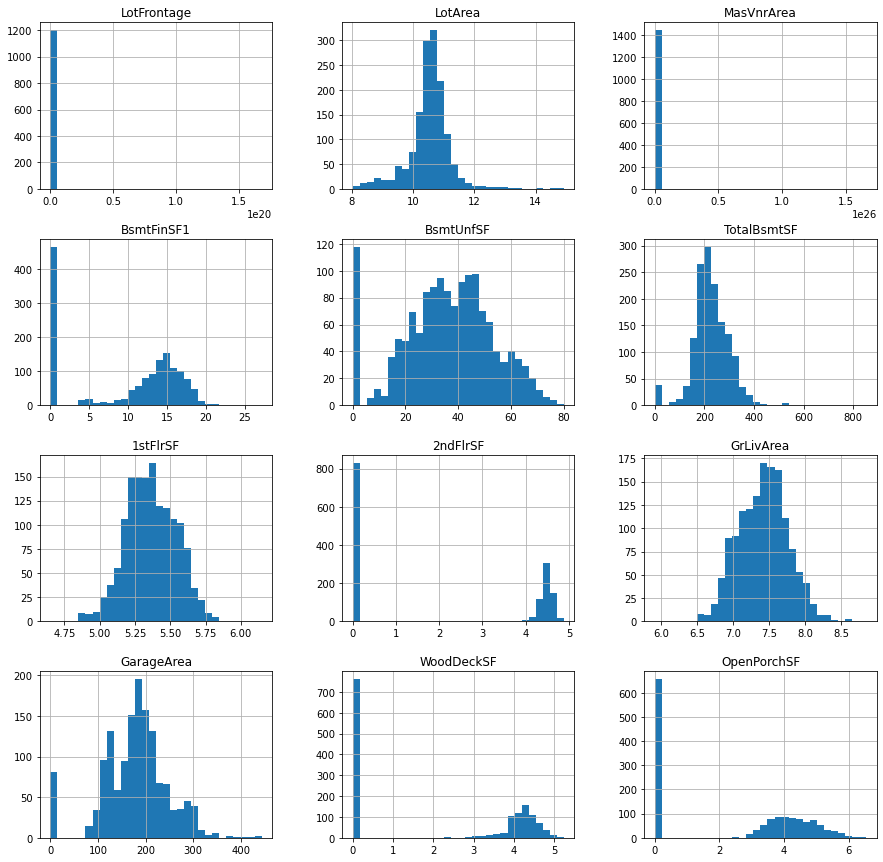

In [31]:
tmp = data.copy()  # Copy data!
for var in cont_vars:
    tmp[var], param = stats.yeojohnson(data[var])
tmp[cont_vars].hist(bins=30, figsize=(15,15))  # plot the histograms!
plt.show()

For **LotFrontage and MasVnrArea** the transformation did not do an amazing job. For **the others**, the values seem to be spread **more evenly in the range**.

Whether this helps improve the predictive power, remains to be seen. To determine if this is the case, we should train a model with the original values and one with the transformed values, and determine model performance, and feature importance. But that escapes the scope of this course.

Here, we will do a quick visual exploration here instead:

**Plot the original or transformed variables vs sale price, and see if there is a relationship!**

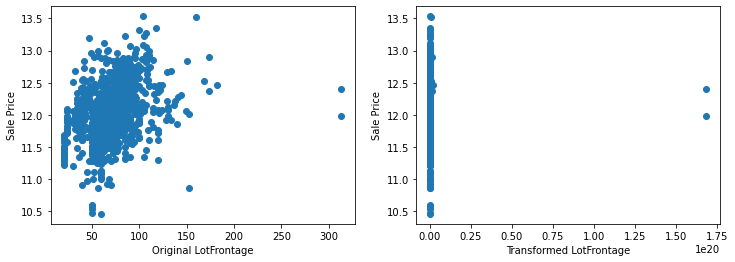

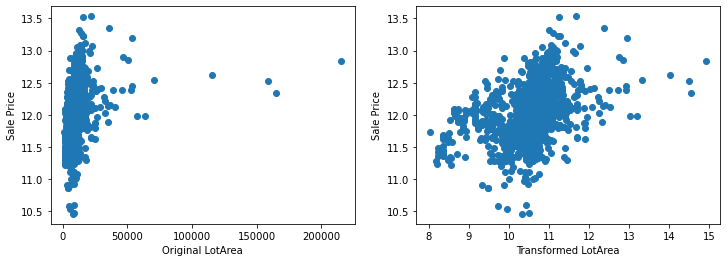

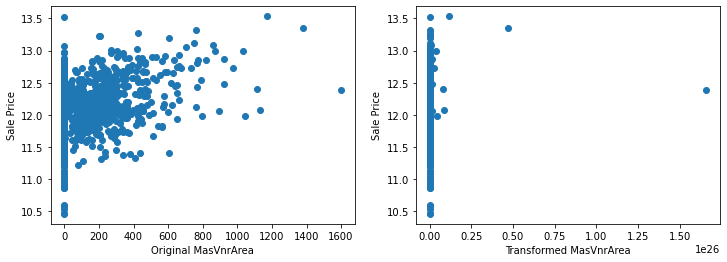

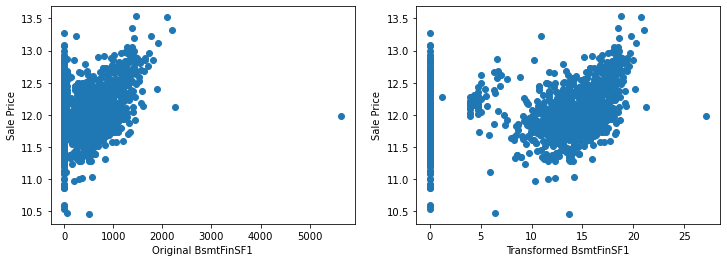

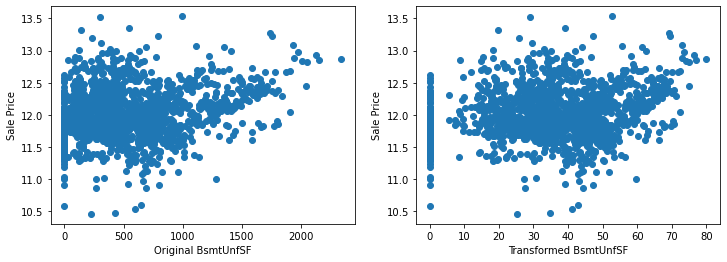

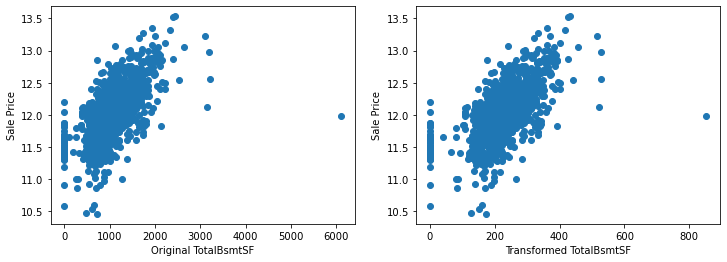

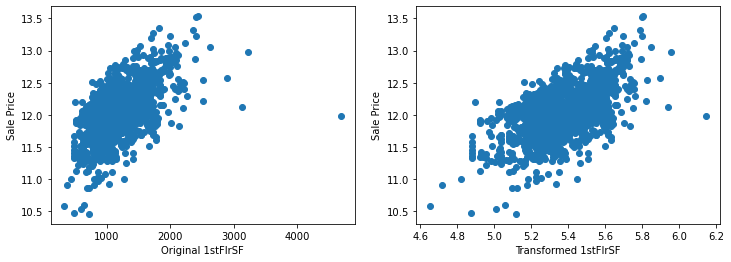

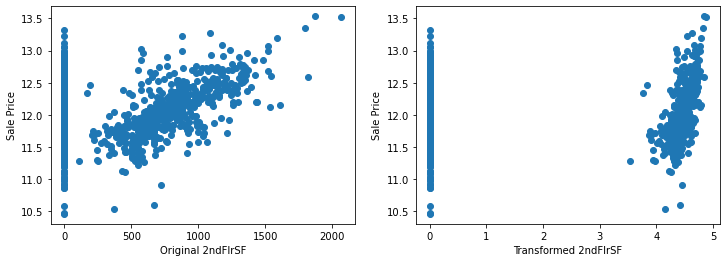

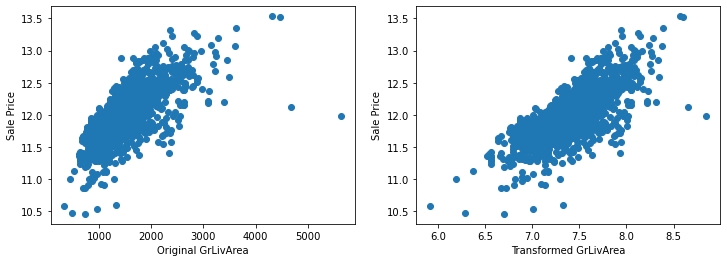

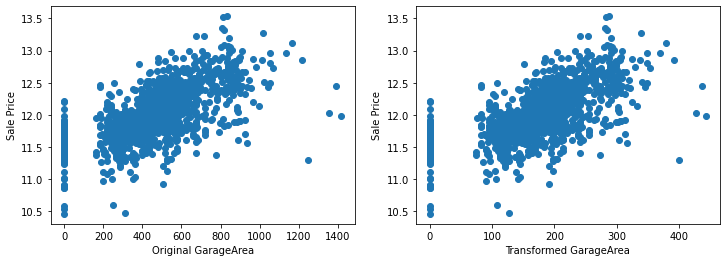

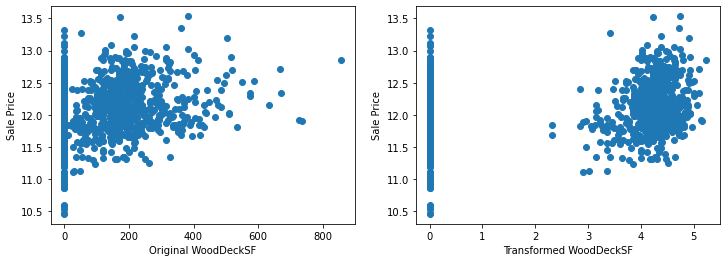

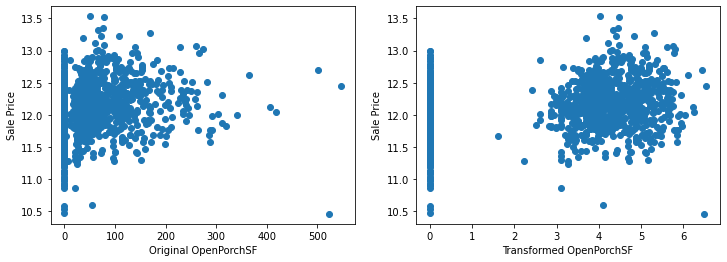

In [32]:
for var in cont_vars:
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)  # plot the original variable
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)
    plt.subplot(1, 2, 2)  # Plot transformed variable
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
    plt.show()

The transformations improves the relationship only for **LotArea**. Try a different transformation now. I variables contain the value 0, we can't apply the logarithmic transformation! We can apply that for the following variables: **["LotFrontage", "1stFlrSF", "GrLivArea"]**.
 
 ### Logarithmic transformation

**Analyse the distributions after logarithmic transformation!**

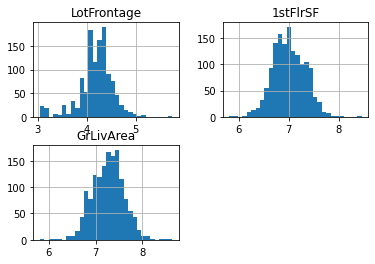

In [33]:
tmp = data.copy()
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    tmp[var] = np.log(data[var])
tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

The distribution of the variables are now **more "Gaussian" looking**!

**Plot the original or transformed variables vs sale price, and see if there is a relationship!**

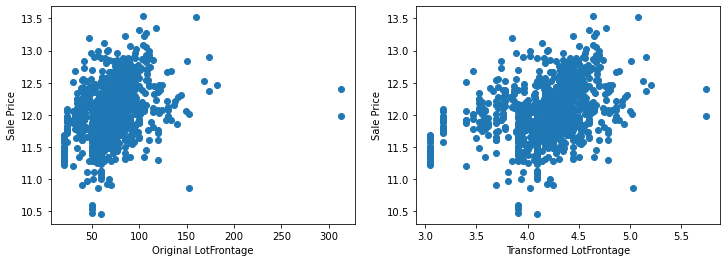

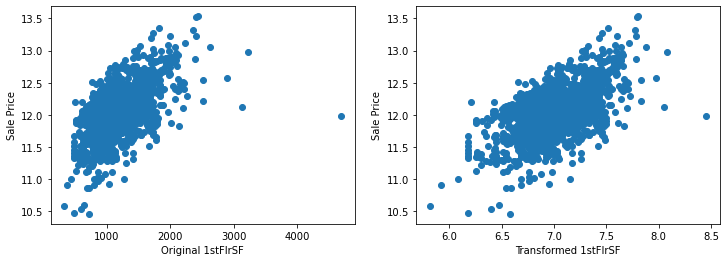

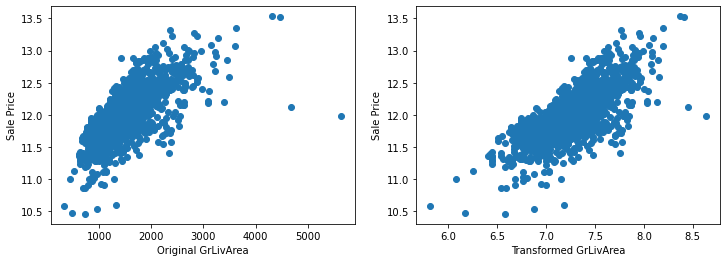

In [34]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)  # plot the original variable vs sale price 
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)
    plt.subplot(1, 2, 2)  # plot transformed variable vs sale price
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)      
    plt.show()

The transformed variables have a better spread of the values, which may in turn, help make better predictions.

## Skewed variables

Let's transform them into binary variables and see how predictive they are:

**Map the variable values into 0 and 1. Then determine mean sale price in the mapped values and plot into a bar graph!**

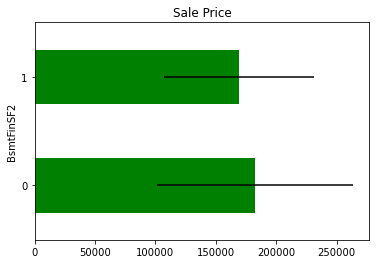

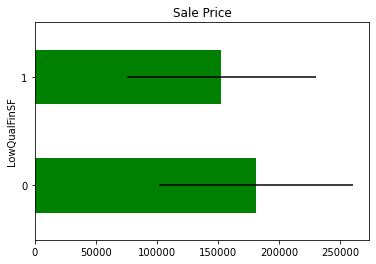

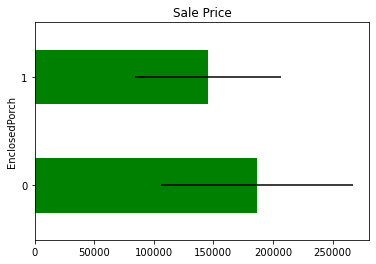

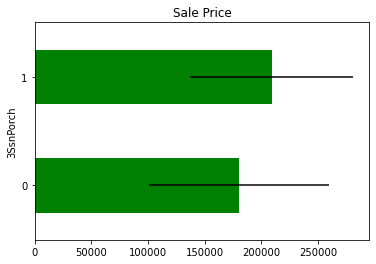

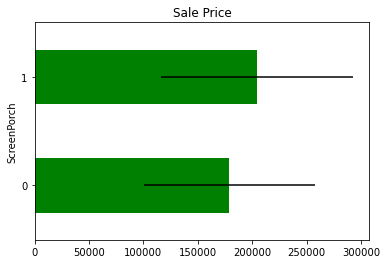

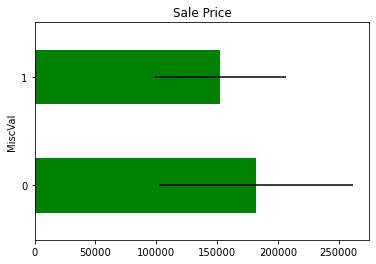

In [35]:
for var in skewed:
    tmp = data.copy()
    tmp[var] = np.where(data[var]==0, 0, 1)
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')
    plt.show()

There seem to be a difference in Sale Price in the mapped values, but the confidence intervals overlap, so most likely this is not significant or predictive.

# Categorical variables

**Number of them!**

In [36]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  44


**Visualise the values of the categorical variables!**

In [37]:
data[cat_vars].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,70
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60


## Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

**How many different categories in each of the variables. Use pandas unique()! Then plot them in descending order**

<AxesSubplot:>

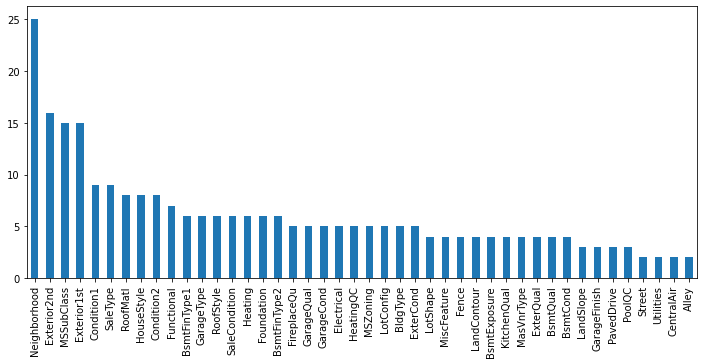

In [38]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering lecture.

## Quality variables

Ex = Excellent, Gd = Good, TA = Average/Typical, Fa =	Fair, Po = Poor. **Replace these categories by numbers** for examle, for the garage, or fence, or kitchen! 

**M**

In [39]:
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}
qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
             'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',]
for var in qual_vars:
    data[var] = data[var].map(qual_mappings)

In [40]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}
var = 'BsmtExposure'
data[var] = data[var].map(exposure_mappings)

In [41]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
finish_vars = ['BsmtFinType1', 'BsmtFinType2']
for var in finish_vars:
    data[var] = data[var].map(finish_mappings)

In [42]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
var = 'GarageFinish'
data[var] = data[var].map(garage_mappings)

In [43]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
var = 'Fence'
data[var] = data[var].map(fence_mappings)

**Capture all quality variables!**

In [44]:
qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

**Plot the house mean sale price based on the quality of the various attributes! Make boxplot with Catplot, adding stripplot!**

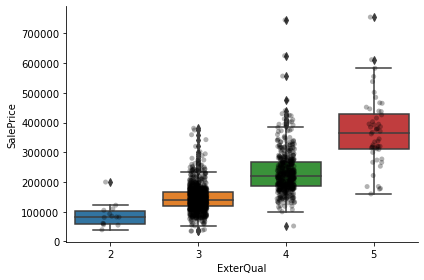

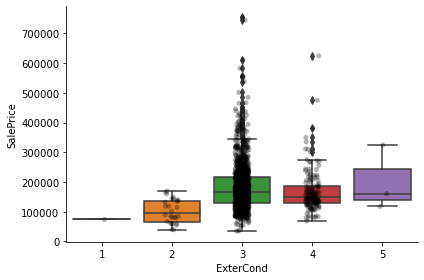

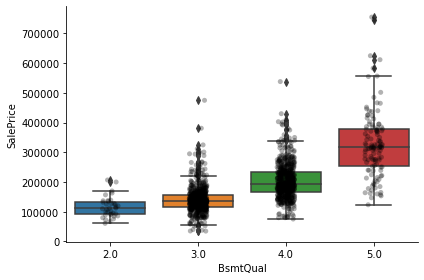

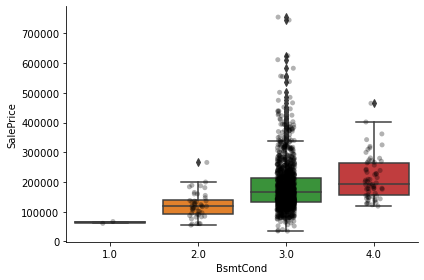

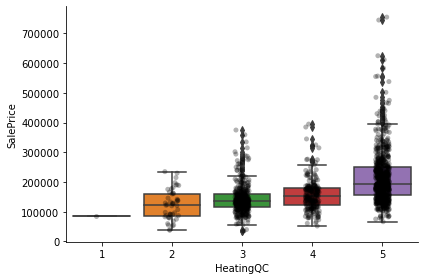

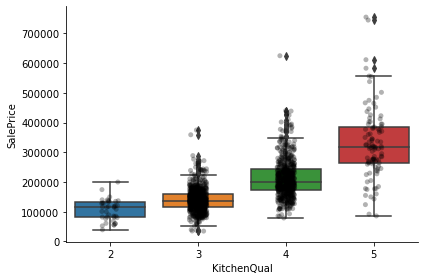

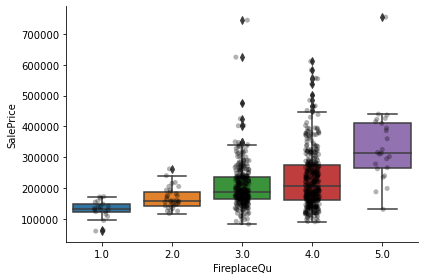

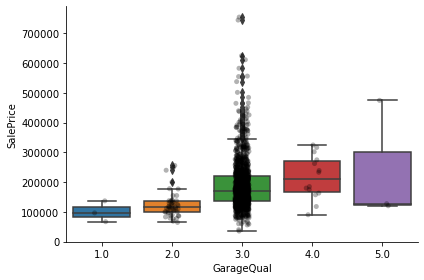

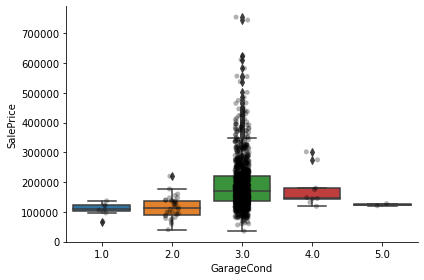

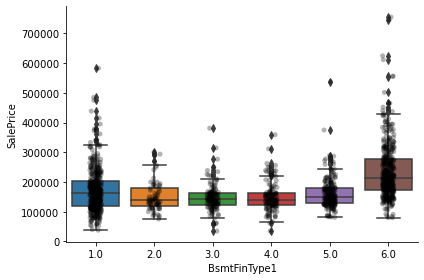

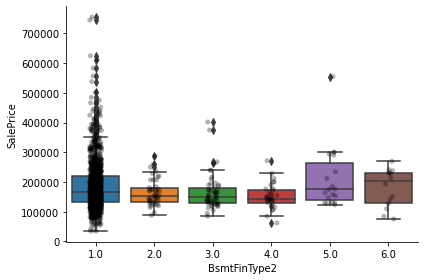

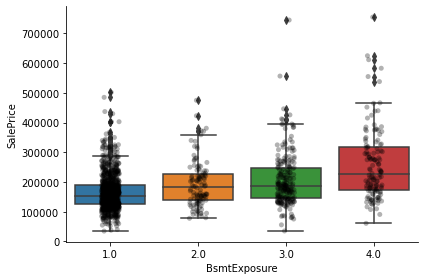

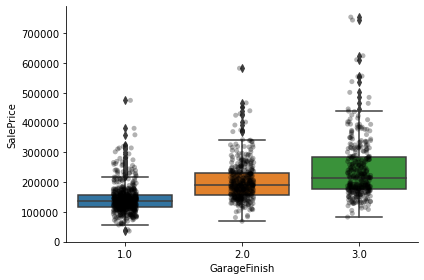

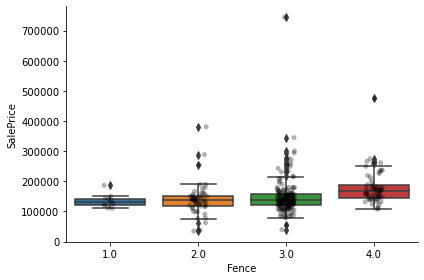

In [45]:
for var in qual_vars:
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most attributes, the increase in the house price with the value of the variable, is quite clear.

**Capture the remaining categorical variables (those that we did not re-map)!**

In [46]:
cat_others = [var for var in cat_vars if var not in qual_vars]
len(cat_others)

30

## Rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

**Determine the % of observations per category, then return categories that are rare! Print categories that are present in less than 1 % of the observations!**

In [47]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    return tmp[tmp < rare_perc]
for var in cat_others:
    print(analyse_rare_labels(data, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Some categorical variables has multiple rare labels! (less than 1% of the houses). Remove then to prevent over-fitting of machine learning models.

**Make boxplot with Catplot and add data points to boxplot with stripplot!**

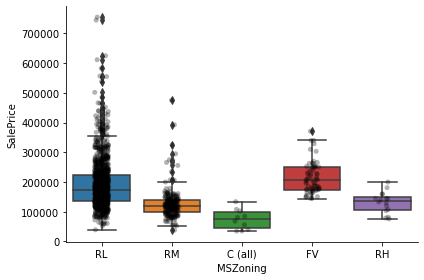

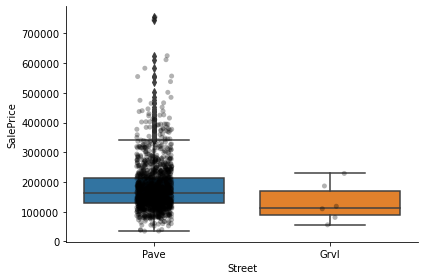

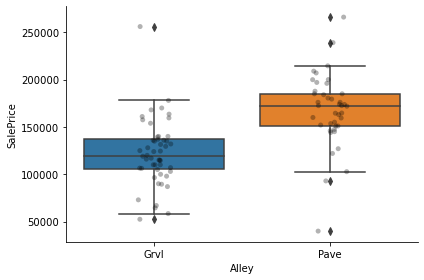

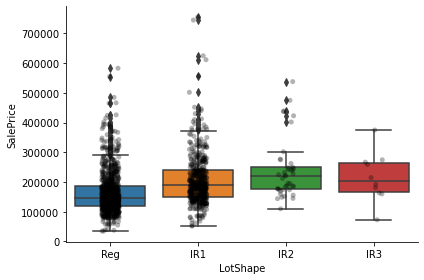

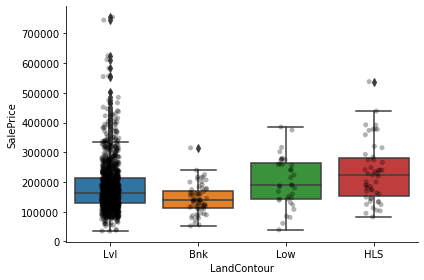

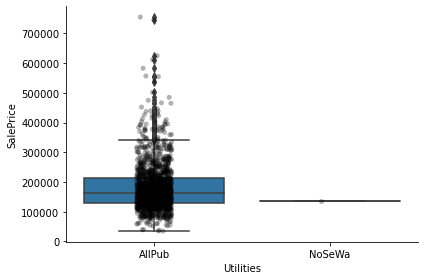

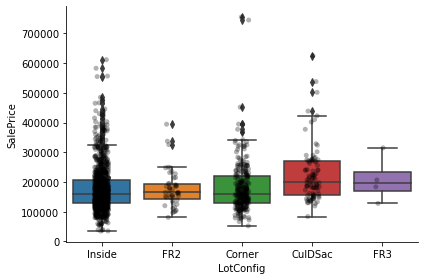

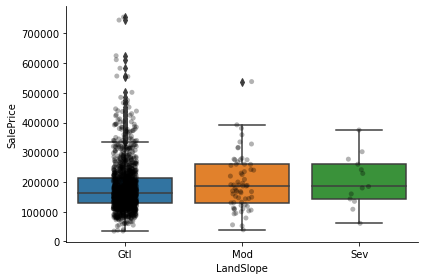

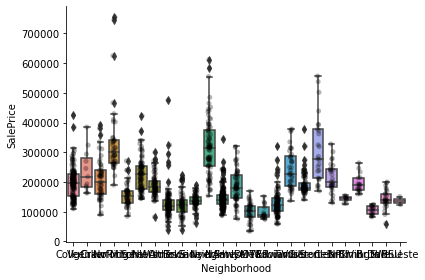

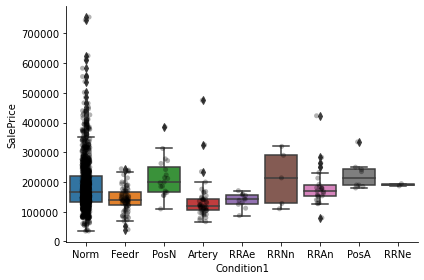

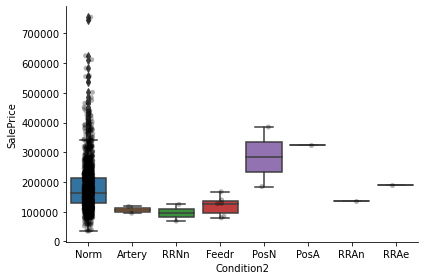

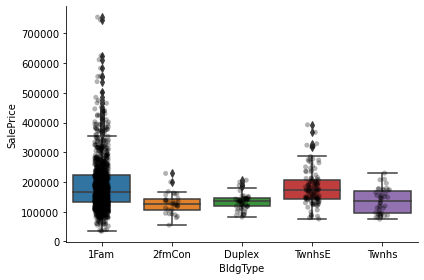

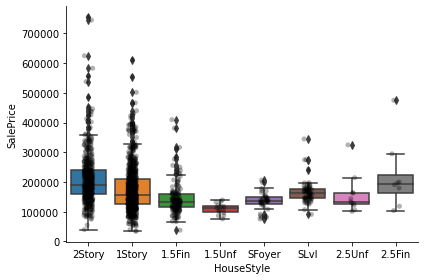

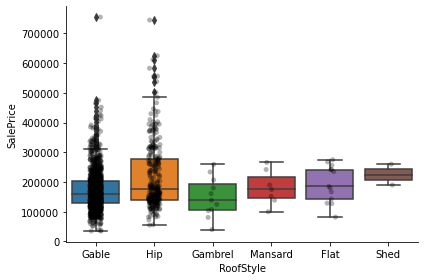

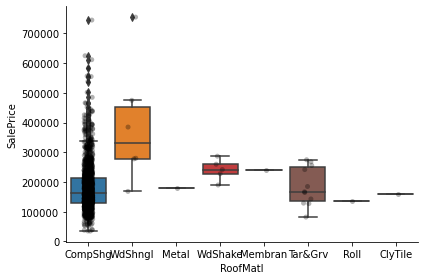

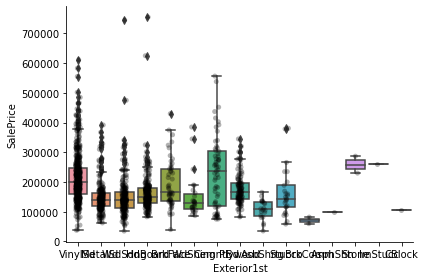

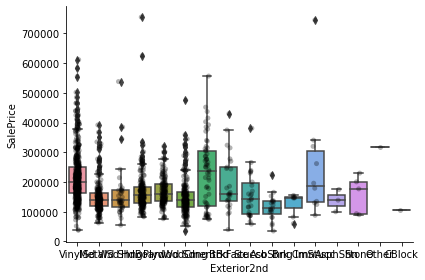

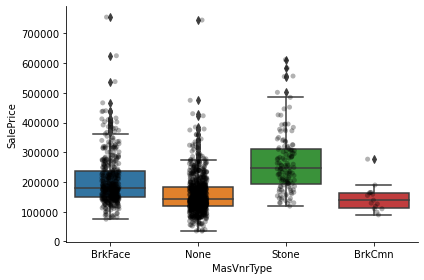

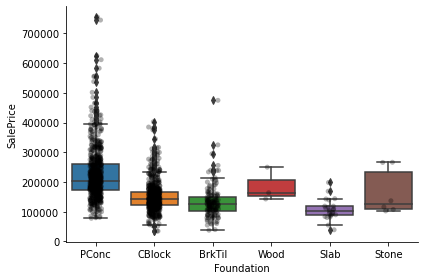

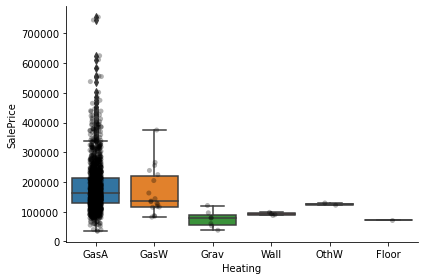

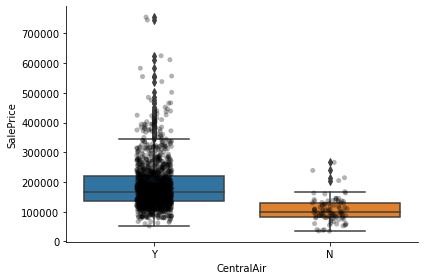

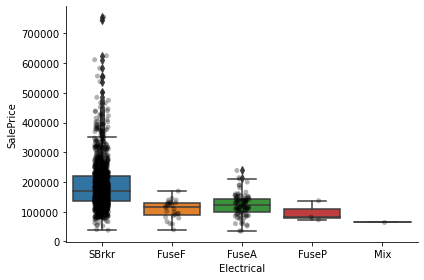

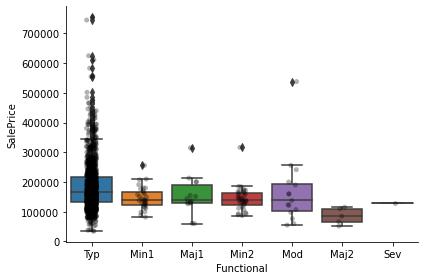

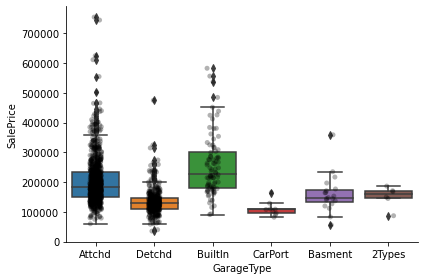

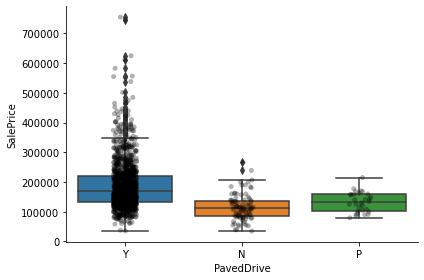

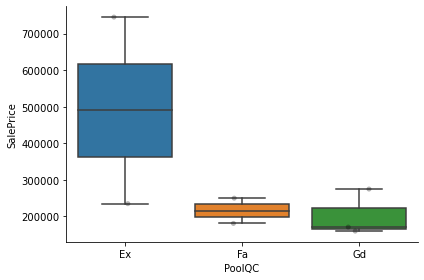

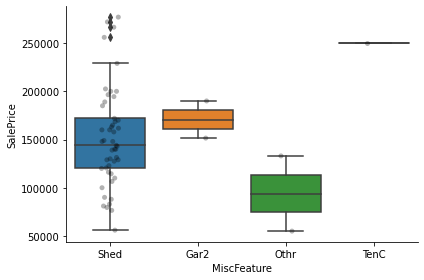

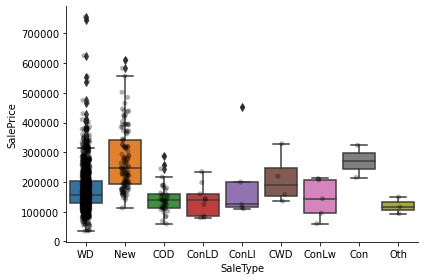

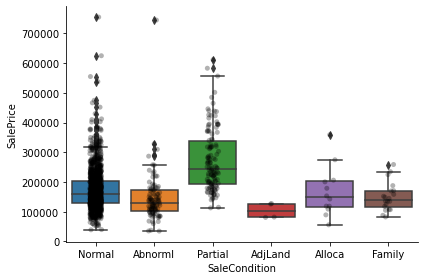

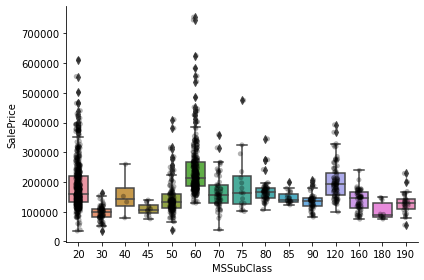

In [48]:
for var in cat_others:
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Clearly, the categories give information on the SalePrice, as different categories show different median sale prices.